## Linear Regression

In [18]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import math

##### TASK 1

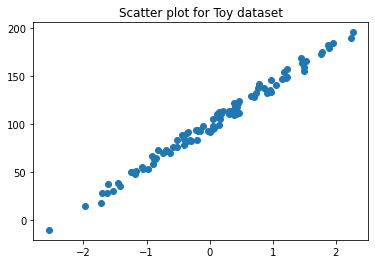

In [2]:
#generating a dataset
X,y=make_regression(n_samples=100,n_features=1,noise=4.0,bias=100.0,random_state=0)
plt.scatter(X,y)
plt.title('Scatter plot for Toy dataset')
plt.show()

In [3]:
#spliting the dataset into training set and test set

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=2)

#fitting linear regression into the training set

TheModel = LinearRegression()
TheModel.fit(X_train, y_train)

#predicting the test set results

ThePrediction = TheModel.predict(X_test)
#print ('Prediction Value of TEST DEPENDENT:\n',ThePrediction)
print ('Score(R square) of the test data is:',TheModel.score(X_test,y_test))
print('MSE:',mean_squared_error(ThePrediction,y_test))

Score(R square) of the test data is: 0.9846284372977757
MSE: 16.14769526145793


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


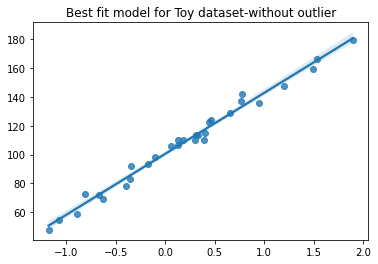

In [22]:
sns.regplot(X_test,y_test)
plt.title('Toy dataset')
plt.title('Best fit model for Toy dataset-without outlier')
plt.show()

##### TASK 2

In [5]:
#WITH OULIERS

In [6]:
Q3=np.quantile(X,0.75)
Q1=np.quantile(X,0.25)
IQR=Q3-Q1
LF=Q1-1.5*IQR
UF=Q3+1.5*IQR
print('Lower fence:',LF,'\nUpper fence:',UF)

Lower fence: -2.715257734891628 
Upper fence: 2.8084784056068184


In [7]:
#Generating outliers(40 outliers-->20 low,20 up)

Out_low=[]
Out_up=[]

import random

for i in range(0,20):
    x = random.uniform(UF,UF+2)
    Out_up.append(x)
    x1=random.uniform(LF,LF-2)
    Out_low.append(x1)

In [8]:
print('The Lower outliers are:')
Out_low

The Lower outliers are:


[-4.2934580872456785,
 -3.9373451963125765,
 -2.729749127684831,
 -3.7641961947229228,
 -3.0599997762279587,
 -3.7912265337104643,
 -2.8654731239621016,
 -4.1335145907071045,
 -3.523777440084578,
 -3.855483098327144,
 -3.530092255798526,
 -2.8142102476622783,
 -3.3946229835428587,
 -4.714920247892409,
 -4.685207341408771,
 -3.202342427408308,
 -3.095432331151482,
 -4.213137129269331,
 -4.545738618711612,
 -3.8869438728542898]

In [9]:
print('The Upper outliers are:')
Out_up

The Upper outliers are:


[3.0181285241217,
 4.754930127378589,
 4.042009472927475,
 2.9544656364852777,
 4.102401757910894,
 3.8962083044786886,
 2.8124482422985184,
 3.3557675385790295,
 3.4727058628173855,
 4.2903745490884075,
 3.8123922985489456,
 3.8466158897491614,
 3.773401444871633,
 4.202999949220977,
 2.952374888590863,
 4.11563338961102,
 3.553410725190889,
 3.5018621085494903,
 3.8900036575242076,
 3.8522665088274106]

In [10]:
#merging all dataframes
OUT=np.append(Out_low,Out_up)
print(type(OUT))
print(OUT)

<class 'numpy.ndarray'>
[-4.29345809 -3.9373452  -2.72974913 -3.76419619 -3.05999978 -3.79122653
 -2.86547312 -4.13351459 -3.52377744 -3.8554831  -3.53009226 -2.81421025
 -3.39462298 -4.71492025 -4.68520734 -3.20234243 -3.09543233 -4.21313713
 -4.54573862 -3.88694387  3.01812852  4.75493013  4.04200947  2.95446564
  4.10240176  3.8962083   2.81244824  3.35576754  3.47270586  4.29037455
  3.8123923   3.84661589  3.77340144  4.20299995  2.95237489  4.11563339
  3.55341073  3.50186211  3.89000366  3.85226651]


In [11]:
#predicting for y (dependent) where x is an outlier
my=LinearRegression()
reg=my.fit(X,y)
predict=my.predict(OUT.reshape(40,1))
Out_y=pd.DataFrame([OUT,predict],index=['x','y']).T
Out_y

,x,y
0,-4.293458,-82.707801
1,-3.937345,-67.580455
2,-2.729749,-16.282891
3,-3.764196,-60.225245
4,-3.060000,-30.311633
5,-3.791227,-61.373469
6,-2.865473,-22.048321
7,-4.133515,-75.913549
8,-3.523777,-50.012479
9,-3.855483,-64.103029


In [12]:
#adding outlier with original one
A=np.array(Out_y['x'])
#A=A.reshape(40,1)
Indep=np.append(X,A)
Indep

array([-0.35955316,  0.97663904,  0.40234164, -0.81314628, -0.88778575,
        0.44386323, -0.97727788,  0.42833187,  0.20827498, -0.31155253,
       -0.51080514,  0.12691209, -1.53624369, -0.40178094,  0.6536186 ,
        1.17877957, -0.17992484,  1.78587049,  1.45427351, -0.68481009,
        0.97873798,  1.89588918, -0.4380743 ,  0.3130677 ,  0.76103773,
        0.77749036,  1.9507754 ,  0.33367433, -0.34791215,  1.53277921,
       -0.89546656, -0.57884966, -1.04855297,  0.37816252,  0.01050002,
        0.46278226,  0.14404357, -0.40317695,  0.0519454 , -1.25279536,
        1.05445173,  0.40015721, -1.70627019,  2.2408932 ,  0.17742614,
       -0.20515826,  1.23029068, -0.85409574,  1.76405235,  0.4105985 ,
       -0.90729836, -1.42001794,  0.46566244,  0.90082649,  1.13940068,
        0.40198936,  0.3869025 , -1.7262826 ,  1.46935877, -0.18718385,
       -0.87079715,  0.3024719 ,  1.20237985, -1.98079647, -2.55298982,
       -1.45436567, -0.02818223,  0.15494743,  1.22244507,  1.86

In [13]:
A1=list(Out_y['y'])
Dep=np.append(y,A1)
Dep

array([  82.87374039,  133.37311226,  114.85482998,   72.78380292,
         63.14219634,  122.48617851,   52.61713803,  117.9372032 ,
        113.87712884,   83.13566732,   76.02257437,  106.94846534,
         30.33521899,   78.44832638,  128.8990423 ,  154.15509614,
         93.37362516,  174.96101098,  169.09441806,   73.05848152,
        145.60756737,  179.203727  ,   88.96541499,  113.6284555 ,
        137.42247988,  142.09165467,  184.34019989,  113.50775294,
         92.21458175,  166.4093299 ,   58.53574444,   76.51183863,
         52.91213628,  121.80795215,   91.57160565,  124.07901336,
        112.20226674,   84.52388428,   95.13199722,   49.75653146,
        140.56449665,  117.17424493,   28.4694471 ,  189.87343363,
        110.125134  ,   83.34114813,  157.5223093 ,   64.25813641,
        173.80595491,  110.43119187,   66.90151284,   35.09105877,
        112.13500056,  132.23837   ,  146.75733052,  118.00506134,
        109.91470772,   17.65409046,  163.91210575,   93.21566

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


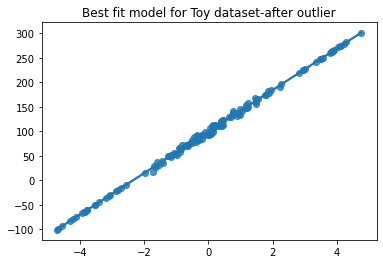

In [23]:
#visualizing new dataset with outliers
sns.regplot(Indep,Dep)
plt.title('Best fit model for Toy dataset-after outlier')
plt.show()

In [25]:
print('The plot with outlier is having low MSE values while comparing it with the plot without outliers')

The plot with outlier is having low MSE values while comparing it with the plot without outliers


##### TASK 3

In [3]:
df=pd.read_excel('communities.xlsx')
df

,state,country,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [4]:
#Removing first five columns
df=df[df.columns[5:]]
df

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [5]:
#removing rows with missing values
NaN=np.nan
df=df.replace('?',NaN)
df=df.dropna(axis=0)
df

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
16,0.15,0.31,0.40,0.63,0.14,0.06,0.58,0.72,0.65,0.47,...,0.06,0.39,0.84,0.06,0.06,0.91,0.5,0.88,0.26,0.49
20,0.25,0.54,0.05,0.71,0.48,0.30,0.42,0.48,0.28,0.32,...,0.09,0.46,0.05,0.09,0.05,0.88,0.5,0.76,0.13,0.34
21,1.00,0.42,0.47,0.59,0.12,0.05,0.41,0.53,0.34,0.33,...,1.00,0.07,0.15,1.00,0.35,0.73,0.0,0.31,0.21,0.69
23,0.11,0.43,0.04,0.89,0.09,0.06,0.45,0.48,0.31,0.46,...,0.16,0.12,0.07,0.04,0.01,0.81,1.0,0.56,0.09,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,1.00,0.29,0.21,0.29,1.00,0.26,0.24,0.47,0.28,0.46,...,0.13,1.00,1.00,0.53,0.62,0.64,0.5,0.64,0.35,0.75
1981,0.07,0.38,0.17,0.84,0.11,0.04,0.35,0.41,0.30,0.64,...,0.09,0.13,0.17,0.02,0.01,0.72,0.0,0.62,0.15,0.07
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


In [6]:
#splitting the data
Indep=df.iloc[:,:-1]   #X
Dep=df.iloc[:,-1:]     #Y
print(Dep)
print(Indep)

      ViolentCrimesPerPop
0                    0.20
16                   0.49
20                   0.34
21                   0.69
23                   0.63
...                   ...
1969                 0.75
1981                 0.07
1991                 0.23
1992                 0.19
1993                 0.48

[319 rows x 1 columns]
      population    householdsize    racepctblack    racePctWhite    \
0             0.19             0.33            0.02            0.90   
16            0.15             0.31            0.40            0.63   
20            0.25             0.54            0.05            0.71   
21            1.00             0.42            0.47            0.59   
23            0.11             0.43            0.04            0.89   
...            ...              ...             ...             ...   
1969          1.00             0.29            0.21            0.29   
1981          0.07             0.38            0.17            0.84   
1991          0.16       

In [7]:
#Training and testing
Indep_train,Indep_test,Dep_train,Dep_test=train_test_split(Indep,Dep,test_size=0.20,random_state=2)

In [8]:
#fitting
OR=LinearRegression().fit(Indep_train,Dep_train)

In [17]:
#predicting
prediction=OR.predict(Indep_test)
print('Predicted values:\n',prediction)

Predicted values:
 [[ 0.1894216 ]
 [ 0.45941667]
 [ 0.32802661]
 [ 0.42499193]
 [ 0.43836592]
 [ 0.71825781]
 [ 0.29661797]
 [ 0.5265131 ]
 [ 0.75442755]
 [ 0.50172993]
 [ 0.22409021]
 [ 0.34488925]
 [ 0.6220696 ]
 [ 0.72391296]
 [ 0.51408157]
 [ 0.73159441]
 [ 0.8307607 ]
 [ 0.84069602]
 [ 0.32477076]
 [ 0.52913402]
 [ 0.70989822]
 [ 0.54409368]
 [ 0.1580274 ]
 [ 0.66643899]
 [ 0.70613922]
 [ 0.65311978]
 [ 0.85996601]
 [ 0.60650369]
 [ 0.63976658]
 [ 0.13834258]
 [ 0.56090677]
 [ 0.7607976 ]
 [ 0.9144162 ]
 [ 0.27357745]
 [-0.00688117]
 [ 0.23467002]
 [ 0.48632971]
 [ 0.61860673]
 [ 0.68795987]
 [ 0.35678579]
 [ 0.26439052]
 [ 0.24017606]
 [ 0.00660208]
 [ 0.32397357]
 [ 0.32208711]
 [ 0.80417404]
 [ 0.88094454]
 [ 0.49701298]
 [ 0.8760322 ]
 [ 0.09215659]
 [-0.09307985]
 [ 0.03689077]
 [ 0.64609574]
 [ 0.68101997]
 [ 1.29720249]
 [ 0.54535102]
 [ 0.3310401 ]
 [ 0.44395088]
 [ 0.71697618]
 [ 1.00077137]
 [ 0.06281576]
 [ 0.11296701]
 [ 0.35985885]
 [ 0.09750158]]


In [32]:
# Weight of model(performance)
print('R square:',OR.score(Indep_test,Dep_test))

R square: 0.5693432185920906


In [33]:
print('This model is just ok and can be considered.')

This model is just ok and can be considered.


##### TASK 4

In [ ]:
#calculating RMSE and Rsquare

In [34]:
print('MSE:',mean_squared_error(prediction,Dep_test))
print ('RMSE:',math.sqrt(mean_squared_error(prediction,Dep_test)))
print('R square:',OR.score(Indep_test,Dep_test))

MSE: 0.040525476031705226
RMSE: 0.20130940373391706
R square: 0.5693432185920906


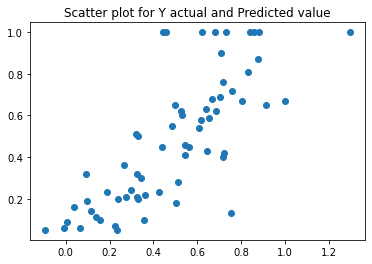

In [29]:
plt.scatter(prediction,Dep_test)
plt.title('Scatter plot for Y actual and Predicted value')
plt.show()

In [35]:
#END